<a href="https://colab.research.google.com/github/tannistha12/ml-house-price-predictor/blob/main/house_price_regression_v1/house_price_regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
y = df['SalePrice']

In [9]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

In [11]:
x = df[features]

In [12]:
print(x.shape)
print(y.shape)

(1460, 8)
(1460,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print('Train:', x_train.shape, y_train.shape)
print('Test:', x_test.shape, y_test.shape)

Train: (1168, 8) (1168,)
Test: (292, 8) (292,)


In [21]:
#create a model
model = LinearRegression()

#train the model
model.fit(x_train, y_train)

#printing coefficient
coeff_df = pd.DataFrame({'Features': x.columns.tolist(), 'Coefficients': model.coef_.tolist()})
print(coeff_df)

      Features  Coefficients
0  OverallQual  20926.075291
1    GrLivArea     49.085945
2   GarageCars  11690.945238
3   GarageArea     13.150836
4  TotalBsmtSF     14.359567
5     1stFlrSF     14.153696
6     FullBath  -5336.676361
7    YearBuilt    360.598440


In [22]:
#make predicitions
y_pred = model.predict(x_test)

#calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#display
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  24932.67
RMSE: 39558.88
R²:   0.7960


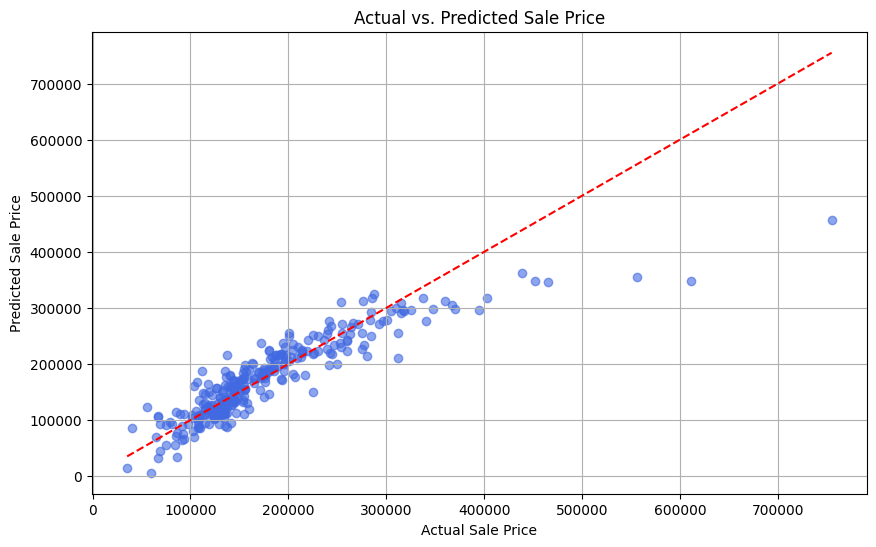

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.show()